# Multiple Linear Regression
More than one input columns and one output column.

# TODO:
- Step1: Import Libraries and Load Data
- Step2: Visualize + Split (Train and Test data)
- Step3: Train the model
- Step4: Predict and Evaluate the Model

## Step1

In [61]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt, numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

In [18]:
data = sns.load_dataset("geyser")
data

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
...,...,...,...
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short


In [33]:
# Encode the categorical data
data[data['kind'] == 'long'] = 1
data[data['kind'] == 'short'] = 0
data['kind']

0      1
1      0
2      1
3      0
4      1
      ..
267    1
268    0
269    1
270    0
271    1
Name: kind, Length: 272, dtype: object

## Step2: Visualize + Split

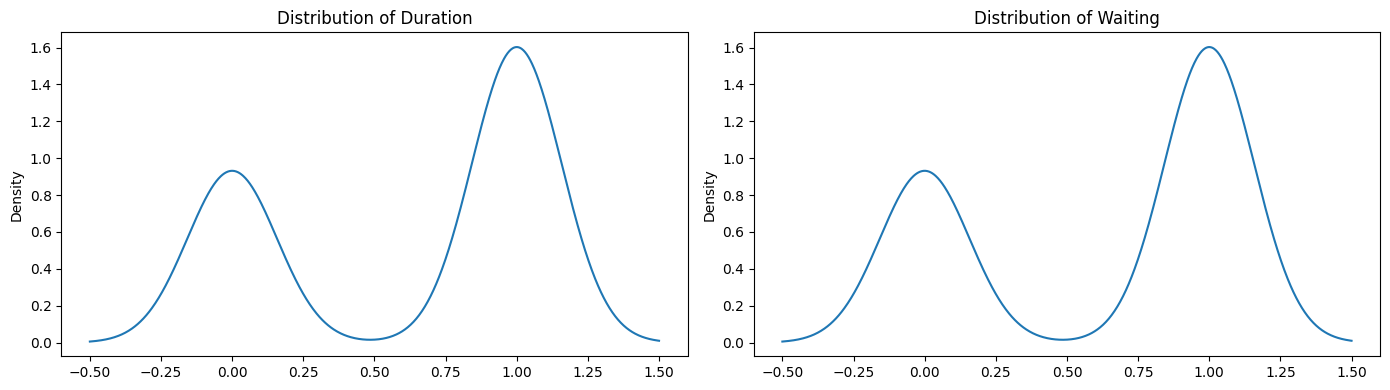

In [36]:
fig , (ax1,ax2) = plt.subplots(1,2,figsize=(14,4))

data['duration'].plot(kind='kde',title="Distribution of Duration",ax=ax1)
data['waiting'].plot(kind='kde',title='Distribution of Waiting',ax=ax2)

fig.tight_layout()

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(data[['duration','waiting']],data['kind'],test_size=0.2,random_state=2)

## Step3: Train the model

In [38]:
# Step1: Import the libraries
# Already imported

# Step2: Create an object
lr = LinearRegression()

# Step3: Fit/feed the training data
lr.fit(X_train.values,Y_train.values)

LinearRegression()

In [46]:
# Step4: Predict 
y_pred = lr.predict(X_test.values)


## Use Regression Evaluation Metrics to get the accuracy

In [49]:
# Step5: Evaluate using regression metrics
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0
R-squared: 1.0


In [53]:
import plotly.express as px
import plotly.graph_objects as go

In [59]:
fig = px.scatter_3d(data,x='duration',y='waiting',z='kind')

fig.add_trace(go.Surface(x = data['duration'], y = data['waiting'], z =data['kind'] ))


In [71]:
X_test.shape, Y_test.shape, y_pred.shape

((55, 2), (55,), (55,))

ValueError: X has 1 features, but LinearRegression is expecting 2 features as input.

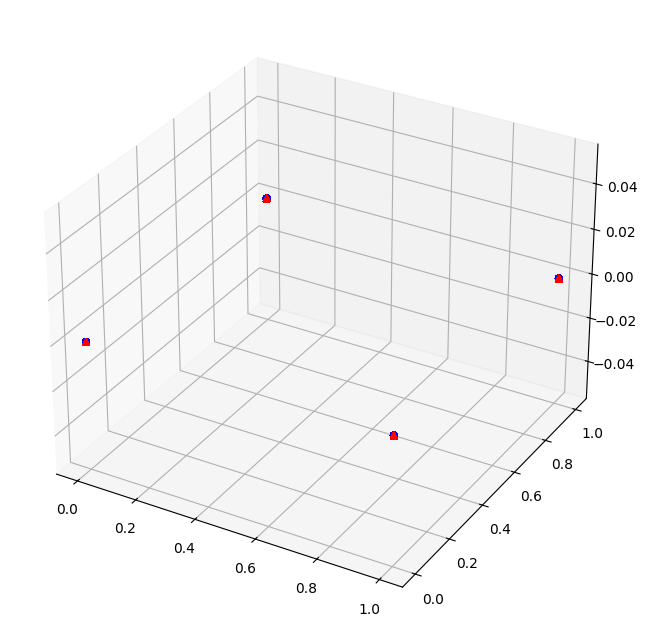

In [76]:
# Plotting the 3D visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot actual data points
ax.scatter(X_test.values.flatten(), Y_test.values.reshape(-1,1), c='blue', marker='o', label='Actual')

# Plot predicted values
ax.scatter(X_test.values.flatten(), y_pred.reshape(-1,1), c='red', marker='^', label='Predicted')

# Plot the regression plane
x_surface = np.linspace(data['duration'].min(), data['duration'].max(), 100)  # Assuming 'duration' is a feature in your data
y_surface = lr.predict(x_surface.reshape(-1, 1))  # Predict using the linear regression model

y_surface = lr.predict(x_surface.reshape(-1, 1))
# X_surface, Y_surface = np.meshgrid(x_surface, y_surface)
# ax.plot_surface(X_surface, Y_surface, x_surface.reshape(-1, 1), alpha=0.3, color='green', label='Regression Plane')

# ax.set_xlabel('Duration')
# ax.set_ylabel('Waiting')
# ax.set_zlabel('Predicted Waiting')
# ax.set_title('Linear Regression: Actual vs Predicted vs Regression Plane')

# plt.legend()
# plt.show()

ax.plot_trisurf(X_test['duration'], X_test['waiting'], y_pred, alpha=0.3, color='green', label='Regression Plane')


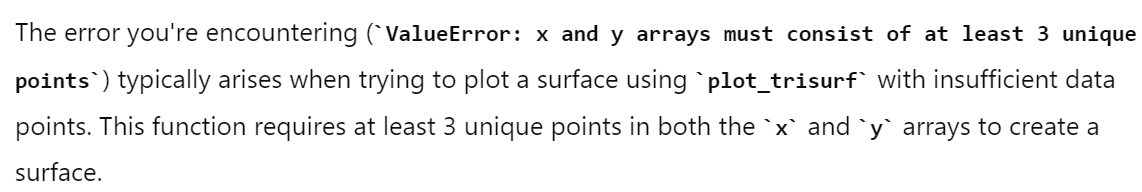

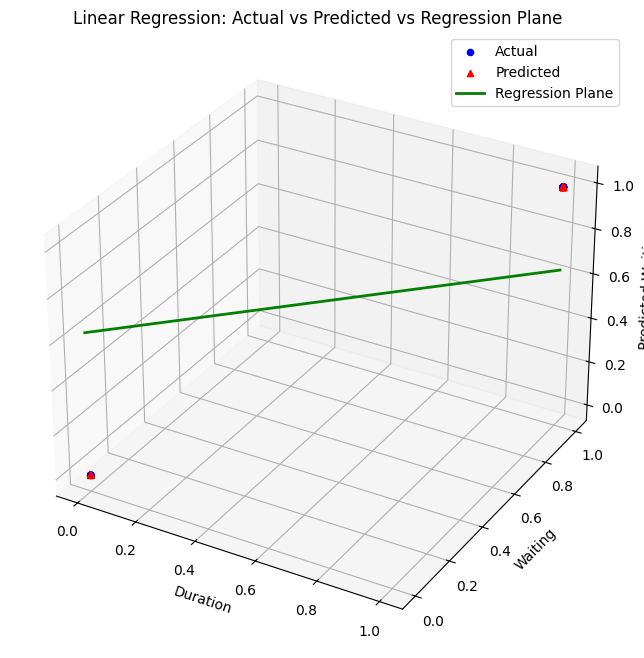

In [86]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plotting the 3D visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# # Plot actual data points
ax.scatter(X_test['duration'], X_test['waiting'], Y_test, c='blue', marker='o', label='Actual')

# # Plot predicted values
ax.scatter(X_test['duration'], X_test['waiting'], y_pred, c='red', marker='^', label='Predicted')

# # Plot the regression plane (approximation with a linear fit)
# # You can add more sophisticated surface fitting if needed
# ax.plot_trisurf(X_test['duration'], X_test['waiting'], y_pred, alpha=0.3, color='green', label='Regression Plane')

# Add a regression plane (simplest approach - a flat plane at mean of y_pred)
mean_y_pred = y_pred.mean()
ax.plot([X_test['duration'].min(), X_test['duration'].max()], 
        [X_test['waiting'].min(), X_test['waiting'].max()], 
        [mean_y_pred, mean_y_pred], color='green', linestyle='-', linewidth=2, label='Regression Plane')



ax.set_xlabel('Duration')
ax.set_ylabel('Waiting')
ax.set_zlabel('Predicted Waiting')
ax.set_title('Linear Regression: Actual vs Predicted vs Regression Plane')

plt.legend()
plt.show()
fig.tight_layout()


In [88]:
# y = mu + nv + c
# two independent variable: slopes?
lr.coef_

array([-1.66573536e-16,  1.00000000e+00])

In [90]:
# c: intercept
lr.intercept_

np.float64(0.0)